Detected target column: Life expectancy
Data shape: (2938, 213)
       Year  Life expectancy  Adult Mortality  infant deaths   Alcohol  \
0  1.621762        -0.471192         1.057680       1.351263 -1.176057   
1  1.404986        -1.020181         1.134943       1.351263 -1.176057   
2  1.188210        -1.020181         1.105970       1.351263 -1.176057   
3  0.971434        -1.063239         1.144601       1.351263 -1.176057   
4  0.754658        -1.095532         1.173575       1.351263 -1.176057   

   percentage expenditure  Hepatitis B   Measles       BMI  under-five deaths  \
0               -0.553370    -2.391880  2.071994 -0.964715           1.519774   
1               -0.545858    -2.717043 -0.023881 -0.989810           1.519774   
2               -0.546877    -2.500268 -0.091294 -1.014905           1.519774   
3               -0.530255    -2.175105  2.071994 -1.040000           1.519774   
4               -0.768242    -2.066717  2.071994 -1.060076           1.519774   

   .

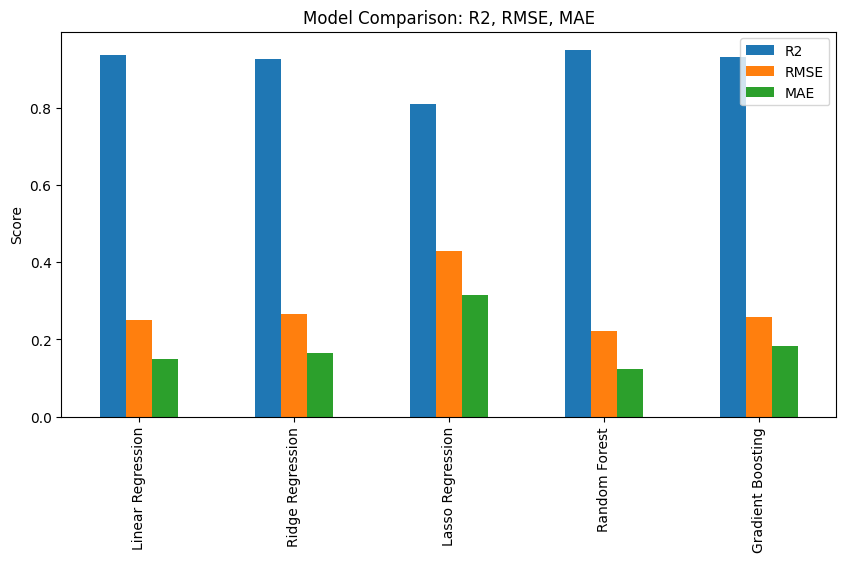

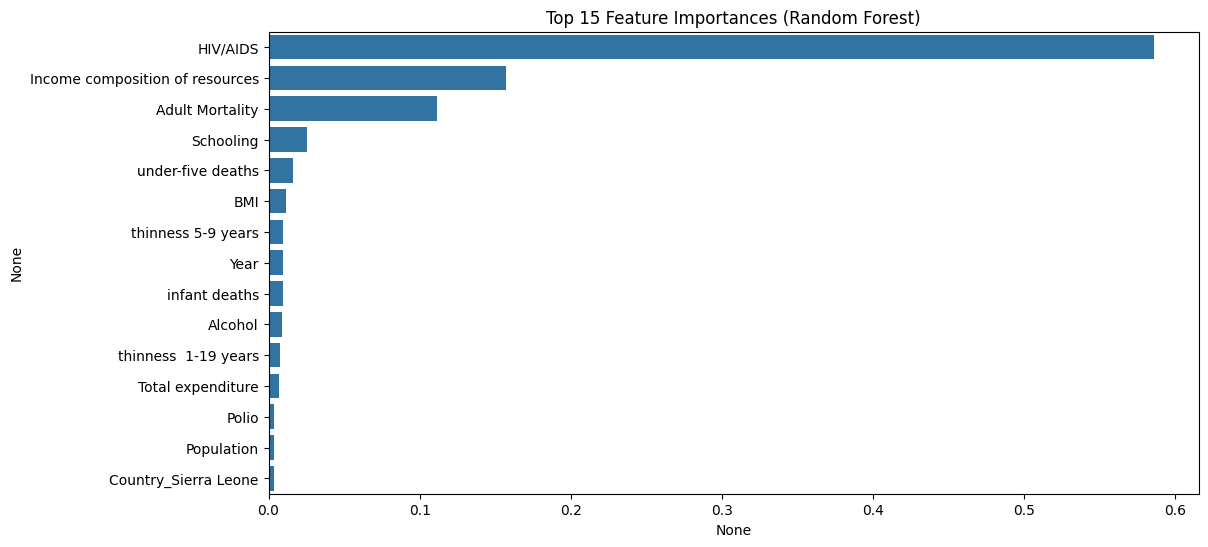

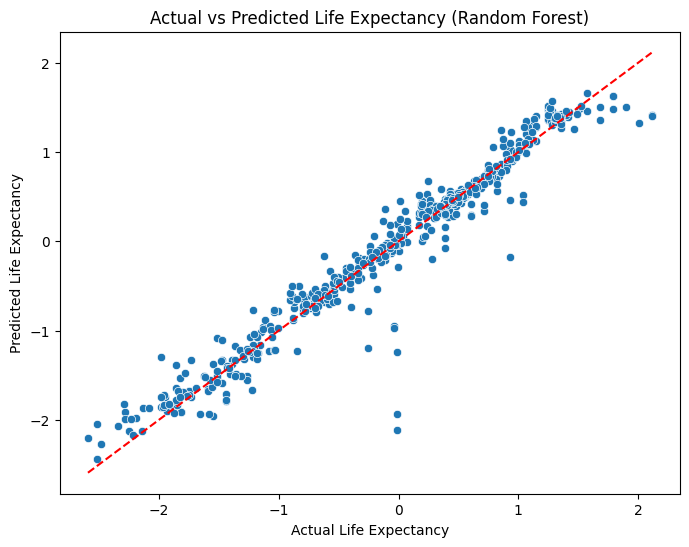

Model metrics saved as 'model_metrics.csv'


In [6]:
# -----------------------------------------
# MODELING NOTEBOOK - LIFE EXPECTANCY
# -----------------------------------------

# 1. IMPORT LIBRARIES
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------
# 2. LOAD FEATURE-ENGINEERED DATA
# -----------------------------------------
df = pd.read_csv("../data/life_expectancy_features.csv")

# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Automatically detect target column containing 'life' and 'expectancy' (case-insensitive)
target_col = None
for col in df.columns:
    if 'life' in col.lower() and 'expectancy' in col.lower():
        target_col = col
        break

if target_col is None:
    raise ValueError("Life Expectancy column not found in the dataset!")

print(f"Detected target column: {target_col}")
print("Data shape:", df.shape)
print(df.head())

# -----------------------------------------
# 3. SPLIT FEATURES AND TARGET
# -----------------------------------------
X = df.drop(columns=[target_col])
y = df[target_col]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# -----------------------------------------
# 4. SPLIT TRAIN/TEST
# -----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# -----------------------------------------
# 5. DEFINE MODELS
# -----------------------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# -----------------------------------------
# 6. TRAIN MODELS & EVALUATE
# -----------------------------------------
model_scores = {}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Metrics
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    mae = mean_absolute_error(y_test, y_pred)
    model_scores[name] = {"R2": r2, "RMSE": rmse, "MAE": mae}
    print(f"{name} - R2: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")

# -----------------------------------------
# 7. MODEL COMPARISON
# -----------------------------------------
metrics_df = pd.DataFrame(model_scores).T
print("\nModel Comparison:\n", metrics_df)

metrics_df.plot(kind='bar', figsize=(10,5))
plt.title("Model Comparison: R2, RMSE, MAE")
plt.ylabel("Score")
plt.show()

# -----------------------------------------
# 8. FEATURE IMPORTANCE (Random Forest)
# -----------------------------------------
rf_model = models['Random Forest']
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=feature_importance[:15], y=feature_importance[:15].index)
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()

# -----------------------------------------
# 9. ACTUAL VS PREDICTED
# -----------------------------------------
y_pred = rf_model.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# -----------------------------------------
# 10. SAVE MODEL METRICS
# -----------------------------------------
metrics_df.to_csv("../data/model_metrics.csv", index=True)
print("Model metrics saved as 'model_metrics.csv'")
